In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train=pd.read_csv(r'C:/Users/Bhakti/Desktop/HAR dataset/train.csv')
from sklearn.preprocessing import LabelEncoder

In [7]:
df_train.head(5)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
x_train=df_train.drop(['subject','Activity'],axis=1)

In [10]:
y_train=df_train['Activity']

In [11]:
activity_number=y_train.value_counts()

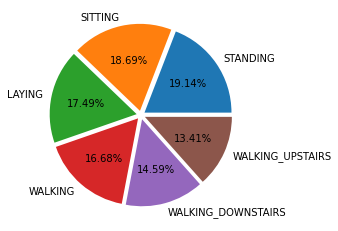

In [12]:
plt.pie(activity_number,labels=y_train.unique(),explode=[0.05,0.05,0.05,0.05,0.05,0.05],autopct='%1.2f%%')
plt.show()

In [13]:
#mean angles in x,y,z directions
pd.pivot_table(df_train,values=['angle(X,gravityMean)','angle(Y,gravityMean)','angle(Z,gravityMean)'],index='Activity',aggfunc=np.mean)

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,
LAYING,0.517116,-0.440820,-0.445712
SITTING,-0.690818,-0.003858,-0.096152
STANDING,-0.773795,0.208318,0.041116
WALKING,-0.757128,0.220458,0.067578
WALKING_DOWNSTAIRS,-0.778271,0.199271,0.058975
WALKING_UPSTAIRS,-0.633301,0.282367,0.128405


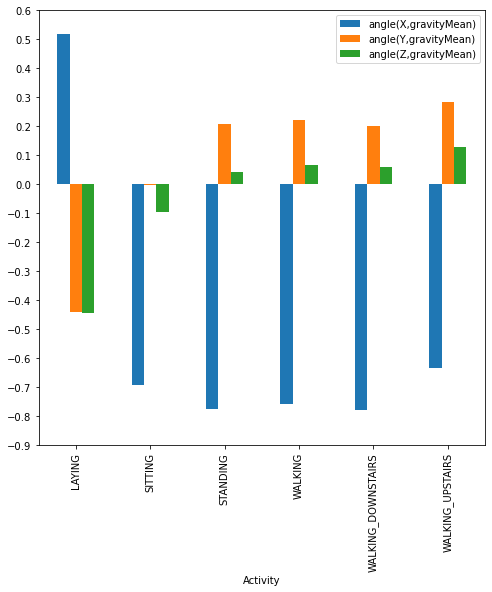

In [14]:
#bar-plot for mean angles.

pd.pivot_table(df_train,values=['angle(X,gravityMean)','angle(Y,gravityMean)','angle(Z,gravityMean)'],index='Activity',aggfunc=np.mean).plot(kind='bar',figsize=(8,8))
plt.yticks(np.arange(-0.9,0.7,0.1))
plt.show()

In [15]:
df_test=pd.read_csv(r'C:/Users/Bhakti/Desktop/HAR dataset/test.csv')

In [16]:
x_test=df_test.drop(['subject','Activity'],axis=1)
y_test=df_test['Activity']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
lr=LogisticRegression(random_state=101)
rfc=RandomForestClassifier(n_estimators=50)
knn=KNeighborsClassifier()


In [19]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
dt_score=dt.score(x_test,y_test)
print(dt_score)

0.8585001696640652


In [21]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=101)

In [22]:
lr_score=lr.score(x_test,y_test)
print(lr_score)

0.9586019681031558


In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [24]:
rf_score=rfc.score(x_test,y_test)
print(rf_score)

0.9253478113335596


In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.9002375296912114


In [28]:
from sklearn.metrics import confusion_matrix

In [30]:
pred_dt=dt.predict(x_test)

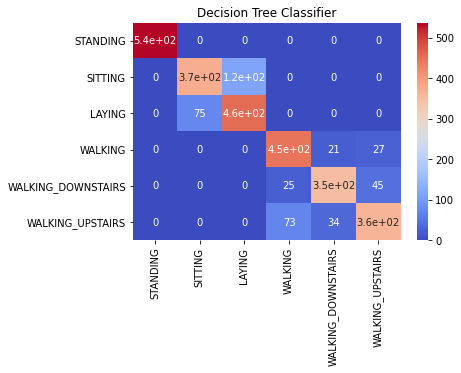

In [37]:
sns.heatmap(confusion_matrix(y_test,pred_dt),xticklabels=y_test.unique(),yticklabels=y_test.unique(),cmap='coolwarm',annot=True)
plt.title('Decision Tree Classifier')
plt.show()

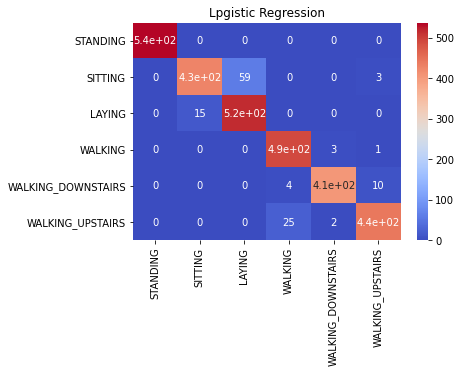

In [38]:
pred_lr=lr.predict(x_test)
sns.heatmap(confusion_matrix(y_test,pred_lr),xticklabels=y_test.unique(),yticklabels=y_test.unique(),cmap='coolwarm',annot=True)
plt.title('Lpgistic Regression')
plt.show()

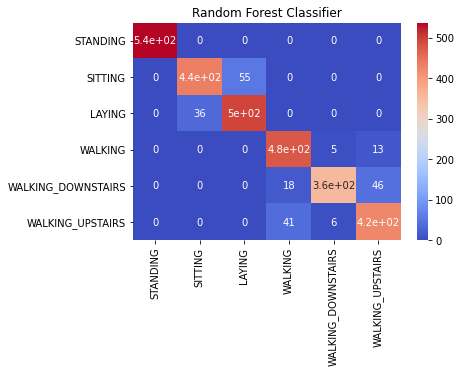

In [39]:
pred_rfc=rfc.predict(x_test)
sns.heatmap(confusion_matrix(y_test,pred_rfc),xticklabels=y_test.unique(),yticklabels=y_test.unique(),cmap='coolwarm',annot=True)
plt.title('Random Forest Classifier')
plt.show()

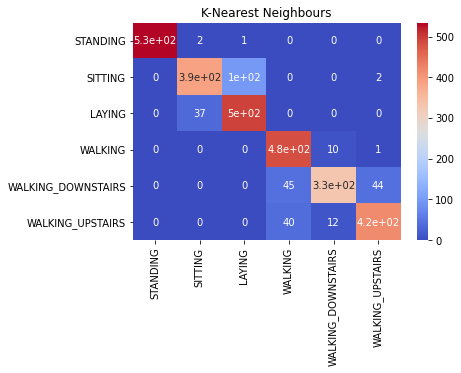

In [40]:
pred_knn=knn.predict(x_test)
sns.heatmap(confusion_matrix(y_test,pred_knn),xticklabels=y_test.unique(),yticklabels=y_test.unique(),cmap='coolwarm',annot=True)
plt.title('K-Nearest Neighbours')
plt.show()

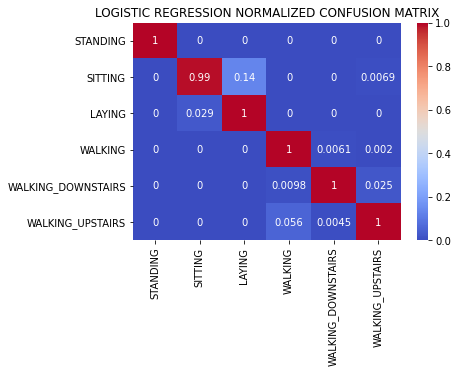

In [55]:
from sklearn.preprocessing import normalize
sns.heatmap(normalize(confusion_matrix(y_test,pred_lr)),xticklabels=y_test.unique(),yticklabels=y_test.unique(),cmap='coolwarm',annot=True)
plt.title('LOGISTIC REGRESSION NORMALIZED CONFUSION MATRIX')
plt.show()

In [56]:
from sklearn.preprocessing import normalize

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(0.95)

In [59]:
encode=LabelEncoder()

In [60]:
df_train_pca=pca.fit_transform(df_train.drop('Activity',axis=1))

In [61]:
df_train['Activity_encoded']=encode.fit_transform(df_train['Activity'])

In [62]:
clf=RandomForestClassifier()

In [63]:
clf.fit(df_train_pca,df_train['Activity_encoded'])

RandomForestClassifier()

In [64]:
rf_pca_score=clf.score(df_train_pca,df_train['Activity_encoded'])

In [65]:
knn1=KNeighborsClassifier()
knn1.fit(df_train_pca,df_train['Activity_encoded'])
knn_pca_score=knn1.score(df_train_pca,df_train['Activity_encoded'])

In [87]:
score_series=pd.Series([dt_score,lr_score,rf_score,knn_score,rf_pca_score,knn_pca_score],['dt_score','lr_score','rf_score','knn_score','rf_pca_score','knn_pca_score'])

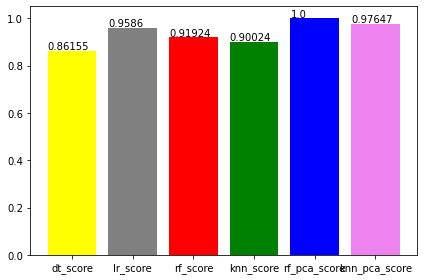

In [92]:
#comparison of different model accuracy scores
bars=plt.bar(score_series.index,score_series.values,color=['yellow','grey', 'red', 'green', 'blue', 'violet'])
for bar in bars:
    yval = round(bar.get_height(),5)
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [68]:
#various model accuracy score
score_series

lr_score         0.958602
rf_score         0.919240
knn_score        0.900238
rf_pca_score     1.000000
knn_pca_score    0.976469
dtype: float64